In [24]:
import xarray as xr
import matplotlib.pyplot as plt

path = r"C:\Users\_s2218026\Documents\lab\data_clean\era_2015_06_u_component_of_wind-v_component_of_wind_850.nc"

ds = xr.open_dataset(path)
ds


<xarray.Dataset> Size: 19MB
Dimensions:    (time: 60, level: 1, latitude: 121, longitude: 321)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 480B 2015-06-01 ... 2015-06-30T12:00:00
  * level      (level) float64 8B 850.0
  * latitude   (latitude) float64 968B 30.0 29.75 29.5 29.25 ... 0.5 0.25 0.0
    expver     (time) <U4 960B ...
  * longitude  (longitude) float64 3kB 100.0 100.2 100.5 ... 179.5 179.8 180.0
Data variables:
    u          (time, level, latitude, longitude) float32 9MB ...
    v          (time, level, latitude, longitude) float32 9MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-16T10:32 GRIB to CDM+CF via cfgrib-0.9.1...

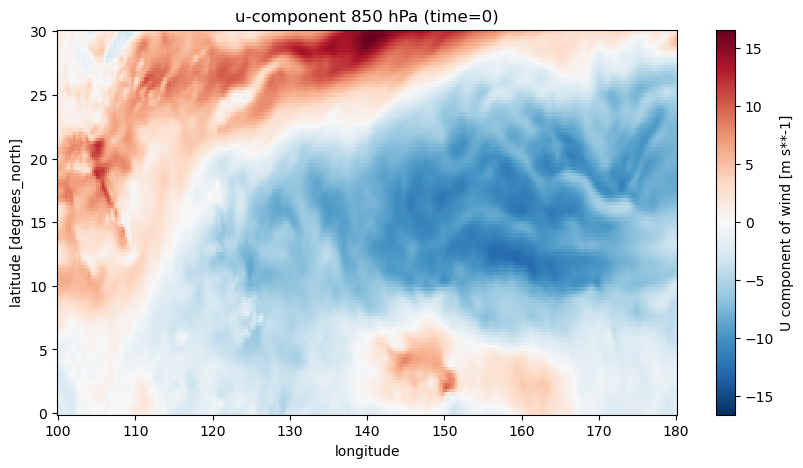

In [25]:
ds["u"].isel(time=0).plot(figsize=(10,5))
plt.title("u-component 850 hPa (time=0)")
plt.show()


In [26]:
print("Latitude first:", float(ds.latitude[0]))
print("Latitude last:", float(ds.latitude[-1]))


Latitude first: 30.0
Latitude last: 0.0


In [27]:
print("Lon min:", float(ds.longitude.min()))
print("Lon max:", float(ds.longitude.max()))


Lon min: 100.0
Lon max: 180.0


In [28]:
for v in ds.data_vars:
    print(v, float(ds[v].min()), float(ds[v].max()))


u -21.880661010742188 26.5220947265625
v -17.1923828125 26.692779541015625


In [29]:
path_vo = r"C:\Users\_s2218026\Documents\lab\data_clean\era_2015_06_vorticity_850.nc"
ds_vo = xr.open_dataset(path_vo)
ds_vo


<xarray.Dataset> Size: 9MB
Dimensions:    (time: 60, level: 1, latitude: 121, longitude: 321)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 480B 2015-06-01 ... 2015-06-30T12:00:00
  * level      (level) float64 8B 850.0
  * latitude   (latitude) float64 968B 30.0 29.75 29.5 29.25 ... 0.5 0.25 0.0
    expver     (time) <U4 960B ...
  * longitude  (longitude) float64 3kB 100.0 100.2 100.5 ... 179.5 179.8 180.0
Data variables:
    vo         (time, level, latitude, longitude) float32 9MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-16T10:37 GRIB to CDM+CF via cfgrib-0.9.1...

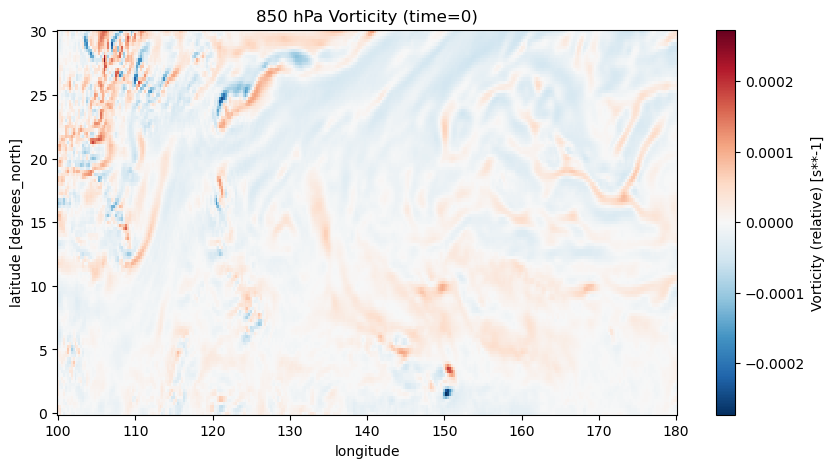

In [30]:
import matplotlib.pyplot as plt

ds_vo["vo"].isel(time=0).plot(figsize=(10,5))
plt.title("850 hPa Vorticity (time=0)")
plt.show()


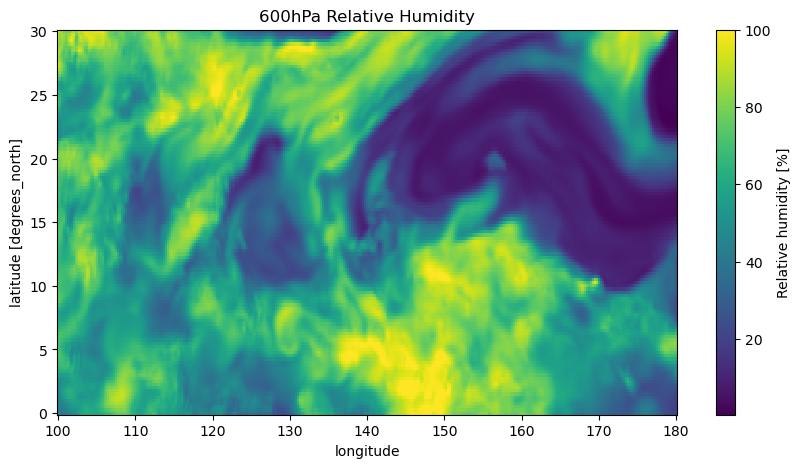

In [31]:
path_rh = r"C:\Users\_s2218026\Documents\lab\data_clean\era_2015_06_temperature-relative_humidity_600.nc"
ds_rh = xr.open_dataset(path_rh)
ds_rh["r"].isel(time=0).plot(figsize=(10,5))
plt.title("600hPa Relative Humidity")
plt.show()


In [32]:
path_850 = r"C:\Users\_s2218026\Documents\lab\data_clean\era_2015_06_u_component_of_wind-v_component_of_wind_850.nc"
path_200 = r"C:\Users\_s2218026\Documents\lab\data_clean\era_2015_06_u_component_of_wind-v_component_of_wind_200.nc"

ds850 = xr.open_dataset(path_850)
ds200 = xr.open_dataset(path_200)

shear_u = ds200["u"].isel(time=0) - ds850["u"].isel(time=0)
shear_v = ds200["v"].isel(time=0) - ds850["v"].isel(time=0)
shear_mag = np.sqrt(shear_u**2 + shear_v**2)

shear_mag.plot(figsize=(10,5))
plt.title("Vertical Wind Shear Magnitude (200–850 hPa)")
plt.show()


ValueError: operands cannot be broadcast together with mismatched lengths for dimension 'level': (0, 1)

In [33]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

path_200 = r"C:\Users\_s2218026\Documents\lab\data_clean\era_2015_06_u_component_of_wind-v_component_of_wind_200.nc"
path_850 = r"C:\Users\_s2218026\Documents\lab\data_clean\era_2015_06_u_component_of_wind-v_component_of_wind_850.nc"

ds200 = xr.open_dataset(path_200)
ds850 = xr.open_dataset(path_850)

print(ds200.dims)
print(ds850.dims)


FrozenMappingWarningOnValuesAccess({'time': 60, 'level': 1, 'latitude': 121, 'longitude': 321})
FrozenMappingWarningOnValuesAccess({'time': 60, 'level': 1, 'latitude': 121, 'longitude': 321})


In [34]:
assert ds200.time.equals(ds850.time)
assert ds200.latitude.equals(ds850.latitude)
assert ds200.longitude.equals(ds850.longitude)
print("Grids match ✔")


Grids match ✔


In [35]:
u200 = ds200["u"].sel(level=200, drop=True)  # dims: (time, latitude, longitude)
v200 = ds200["v"].sel(level=200, drop=True)

u850 = ds850["u"].sel(level=850, drop=True)
v850 = ds850["v"].sel(level=850, drop=True)

print(u200.dims, u850.dims)  # should both be ('time', 'latitude', 'longitude')


('time', 'latitude', 'longitude') ('time', 'latitude', 'longitude')


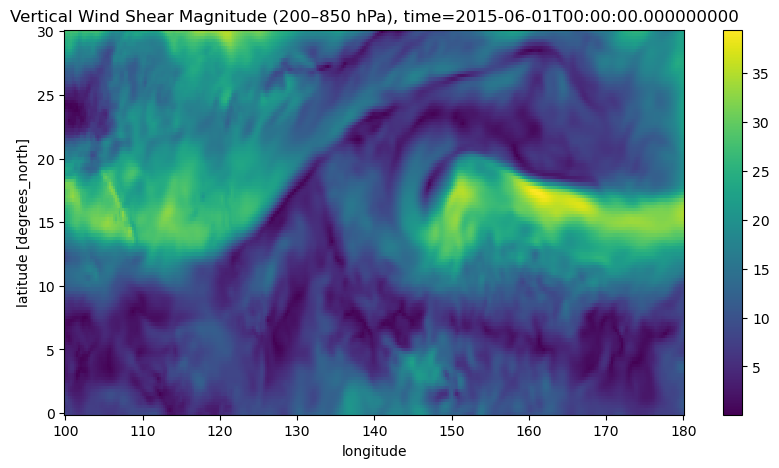

In [36]:
shear_u = u200 - u850
shear_v = v200 - v850
shear_mag = np.sqrt(shear_u**2 + shear_v**2)

# Pick a time index to visualize, e.g. first time step
tidx = 0
shear_mag.isel(time=tidx).plot(figsize=(10, 5))
plt.title(f"Vertical Wind Shear Magnitude (200–850 hPa), time={str(shear_mag.time.values[tidx])}")
plt.show()


RAW dims: FrozenMappingWarningOnValuesAccess({'valid_time': 62, 'pressure_level': 1, 'latitude': 121, 'longitude': 321})
CLEAN dims: FrozenMappingWarningOnValuesAccess({'time': 62, 'level': 1, 'latitude': 121, 'longitude': 321})
RAW vars: ['u', 'v']
CLEAN vars: ['u', 'v']


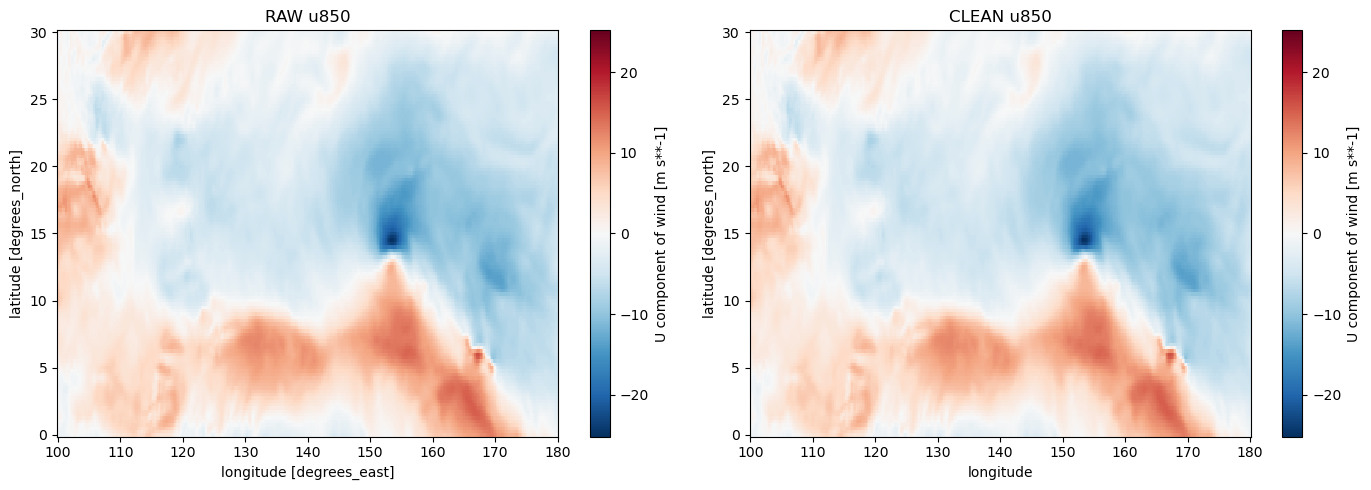

In [37]:
import xarray as xr
import matplotlib.pyplot as plt

raw_path   = r"C:\Users\_s2218026\Documents\lab\data\era_2015_08_u_component_of_wind-v_component_of_wind_850.nc"
clean_path = r"C:\Users\_s2218026\Documents\lab\data_clean\era_2015_08_u_component_of_wind-v_component_of_wind_850.nc"

raw   = xr.open_dataset(raw_path)
clean = xr.open_dataset(clean_path)

print("RAW dims:", raw.dims)
print("CLEAN dims:", clean.dims)
print("RAW vars:", list(raw.data_vars))
print("CLEAN vars:", list(clean.data_vars))

# 🔹 1) Standardize raw dims to match clean
raw_std = raw.rename({
    "valid_time": "time",
    "pressure_level": "level",
})

# (optional) drop 'number' / 'expver' if you don’t care:
# raw_std = raw_std.drop_vars(["number", "expver"])

# 🔹 2) Align spatial domain with the clean file (just to be safe)
raw_box   = raw_std.sel(
    latitude=slice(clean.latitude.max(), clean.latitude.min()),
    longitude=slice(clean.longitude.min(), clean.longitude.max())
)

# 🔹 3) Take first time slice
raw_u   = raw_box["u"].isel(time=0)
clean_u = clean["u"].isel(time=0)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
raw_u.plot(ax=ax[0])
ax[0].set_title("RAW u850")

clean_u.plot(ax=ax[1])
ax[1].set_title("CLEAN u850")

plt.tight_layout()
plt.show()


In [38]:
import os
import xarray as xr
import matplotlib.pyplot as plt

DATA_DIR   = r"C:\Users\_s2218026\Documents\lab\data"
DATA_CLEAN = r"C:\Users\_s2218026\Documents\lab\data_clean"


In [39]:
def open_raw_std(year, month, key):
    """
    Open RAW file (in DATA_DIR) and rename coords
    so they match the CLEAN structure.
    """
    path = os.path.join(DATA_DIR, f"era_{year}_{month:02d}_{key}.nc")
    ds = xr.open_dataset(path)

    # Rename dims/coords to match clean
    rename_dim = {}
    if "valid_time" in ds.dims:
        rename_dim["valid_time"] = "time"
    if "pressure_level" in ds.dims:
        rename_dim["pressure_level"] = "level"

    ds = ds.rename(rename_dim)

    # We won't normalize var names here (your raw already has u,v,t,r,vo)
    return ds


def open_clean(year, month, key):
    path = os.path.join(DATA_CLEAN, f"era_{year}_{month:02d}_{key}.nc")
    ds = xr.open_dataset(path)
    return ds


In [40]:
def plot_months_compare(year, months, key, var, t_index=0, vmin=None, vmax=None):
    """
    Plot RAW vs CLEAN for a given var over multiple months.

    year    : int, e.g. 2015
    months  : list of ints, e.g. [6,7,8,9,10,11]
    key     : file key, e.g. "u_component_of_wind-v_component_of_wind_850"
    var     : variable name, e.g. "u", "v", "t", "r", "vo"
    t_index : which time index to plot (default: 0)
    vmin/vmax : color scale; if None, computed from CLEAN for that month
    """
    n = len(months)
    fig, axes = plt.subplots(n, 2, figsize=(10, 3*n), constrained_layout=True)

    # If only one month, axes might not be 2D
    if n == 1:
        axes = axes.reshape(1, 2)

    for i, m in enumerate(months):
        # --- open datasets
        raw   = open_raw_std(year, m, key)
        clean = open_clean(year, m, key)

        # Align bbox: RAW may be global; CLEAN is already clipped to 30–0N, 100–180E
        raw_box = raw.sel(
            latitude=slice(clean.latitude.max(), clean.latitude.min()),
            longitude=slice(clean.longitude.min(), clean.longitude.max())
        )

        # Some files have a 'level' dimension, some don't (but in your case they do, size 1)
        da_raw   = raw_box[var]
        da_clean = clean[var]

        # For simplicity, always drop 'level' if present
        if "level" in da_raw.dims:
            da_raw = da_raw.isel(level=0, drop=True)
        if "level" in da_clean.dims:
            da_clean = da_clean.isel(level=0, drop=True)

        # Select time
        da_raw_t   = da_raw.isel(time=t_index)
        da_clean_t = da_clean.isel(time=t_index)

        # Shared color scale per row if not given
        if vmin is None or vmax is None:
            lo = float(da_clean_t.min())
            hi = float(da_clean_t.max())
        else:
            lo, hi = vmin, vmax

        # --- plot RAW
        ax0 = axes[i, 0]
        da_raw_t.plot(ax=ax0, vmin=lo, vmax=hi, add_colorbar=False)
        ax0.set_title(f"{year}-{m:02d} RAW {var}")

        # --- plot CLEAN
        ax1 = axes[i, 1]
        da_clean_t.plot(ax=ax1, vmin=lo, vmax=hi, add_colorbar=False)
        ax1.set_title(f"{year}-{m:02d} CLEAN {var}")

        # clean up axis labels a bit
        ax0.set_xlabel("")
        ax1.set_xlabel("")
        ax0.set_ylabel("lat")
        ax1.set_ylabel("")

        raw.close()
        clean.close()

    # Add one shared colorbar
    # (grab last mappable)
    mappable = da_clean_t.plot(vmin=lo, vmax=hi, add_colorbar=False)
    cbar = fig.colorbar(mappable, ax=axes, orientation="vertical", shrink=0.8)
    cbar.set_label(var)

    plt.show()


In [41]:
months = [6, 7, 8, 9, 10, 11]
year   = 2015


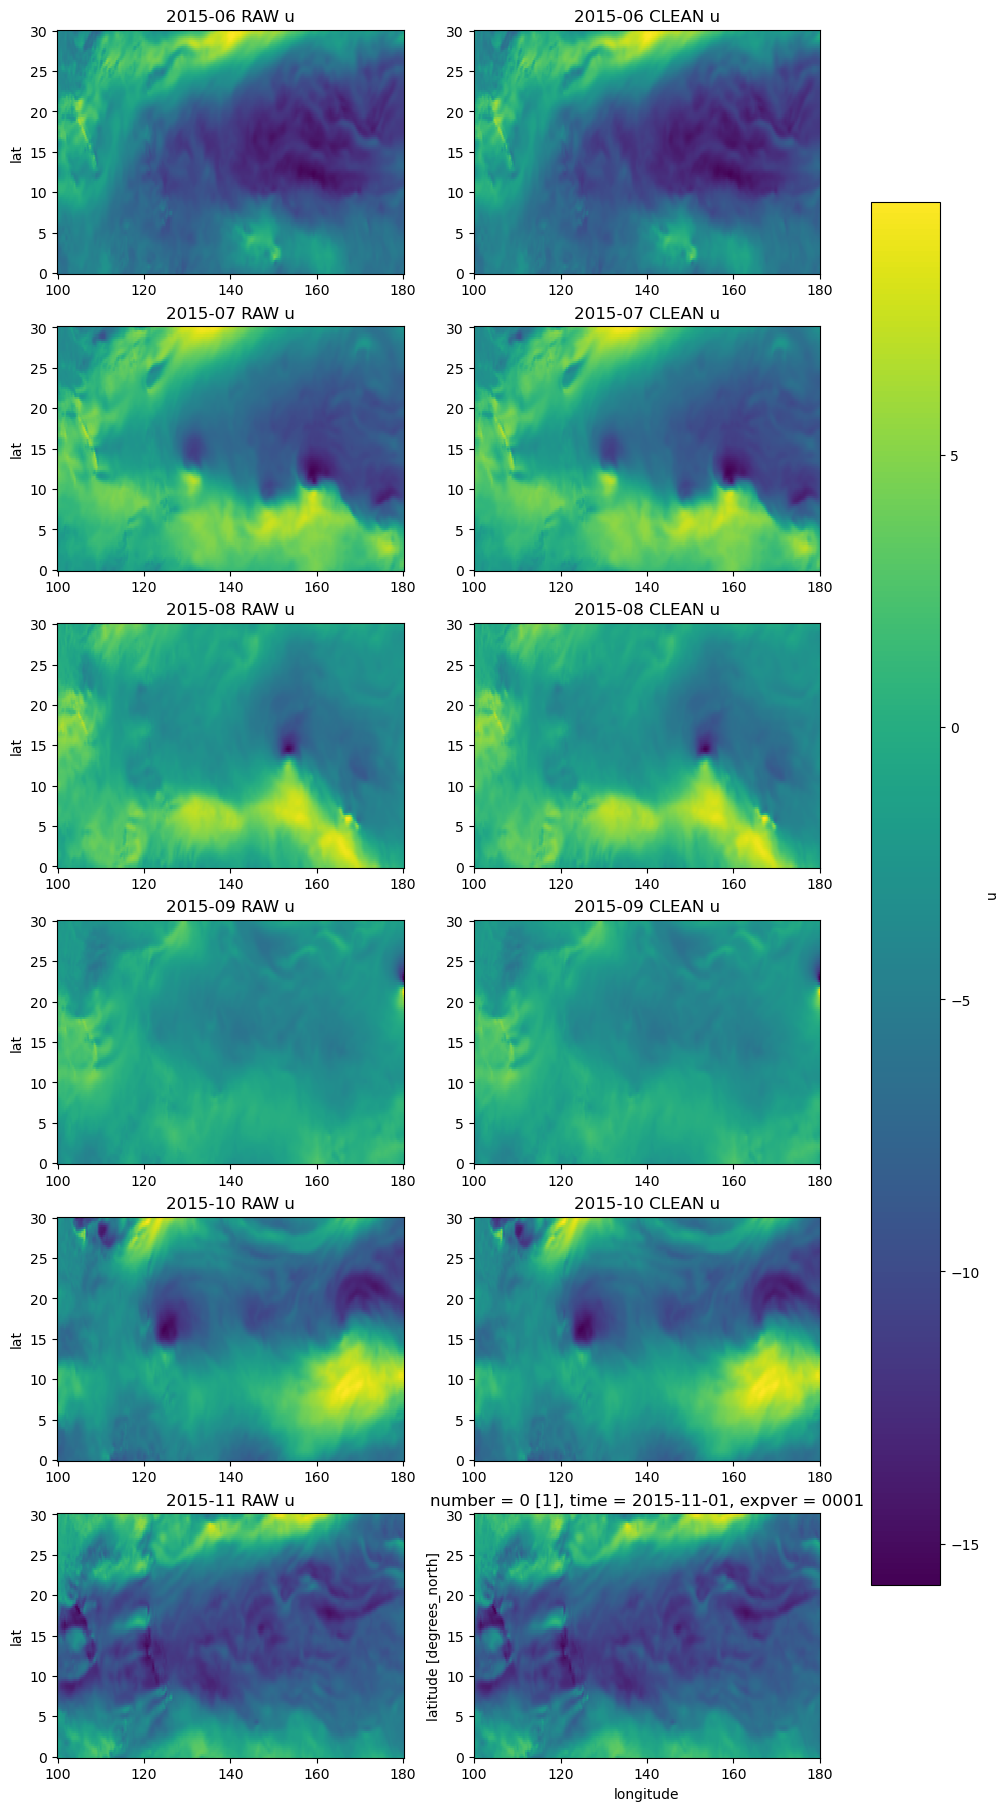

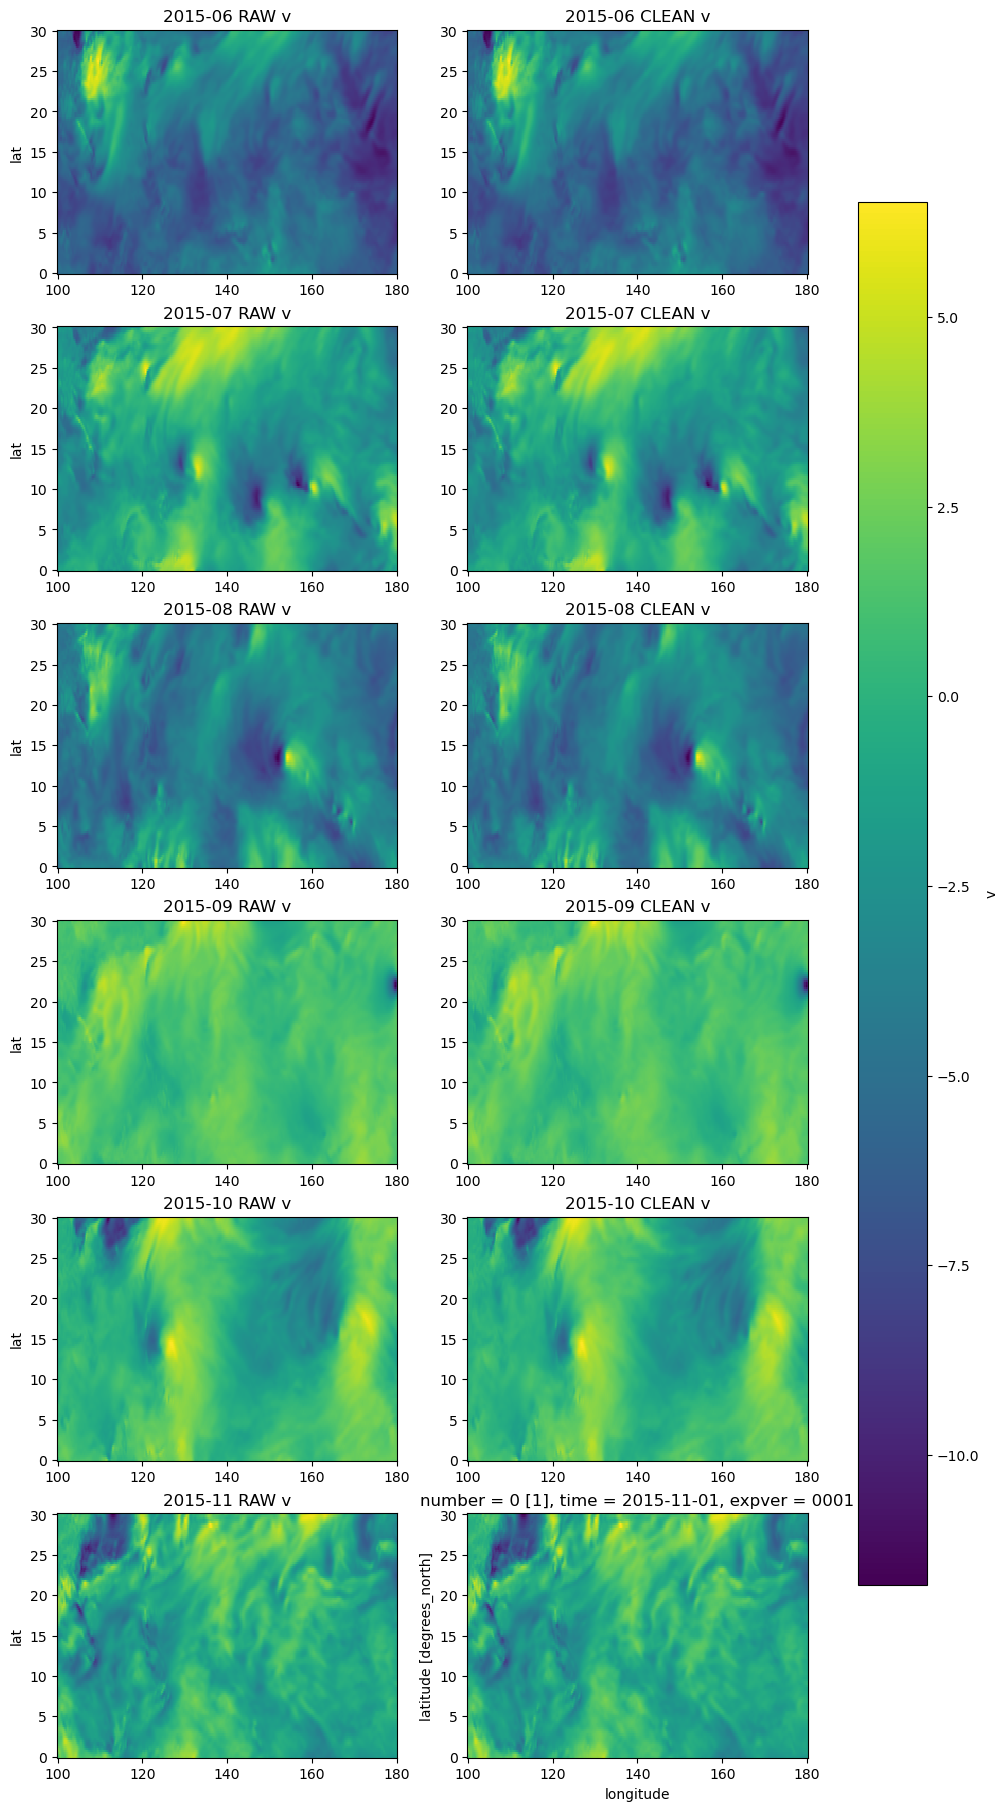

In [42]:
key_uv850 = "u_component_of_wind-v_component_of_wind_850"

plot_months_compare(year, months, key=key_uv850, var="u", t_index=0)
plot_months_compare(year, months, key=key_uv850, var="v", t_index=0)


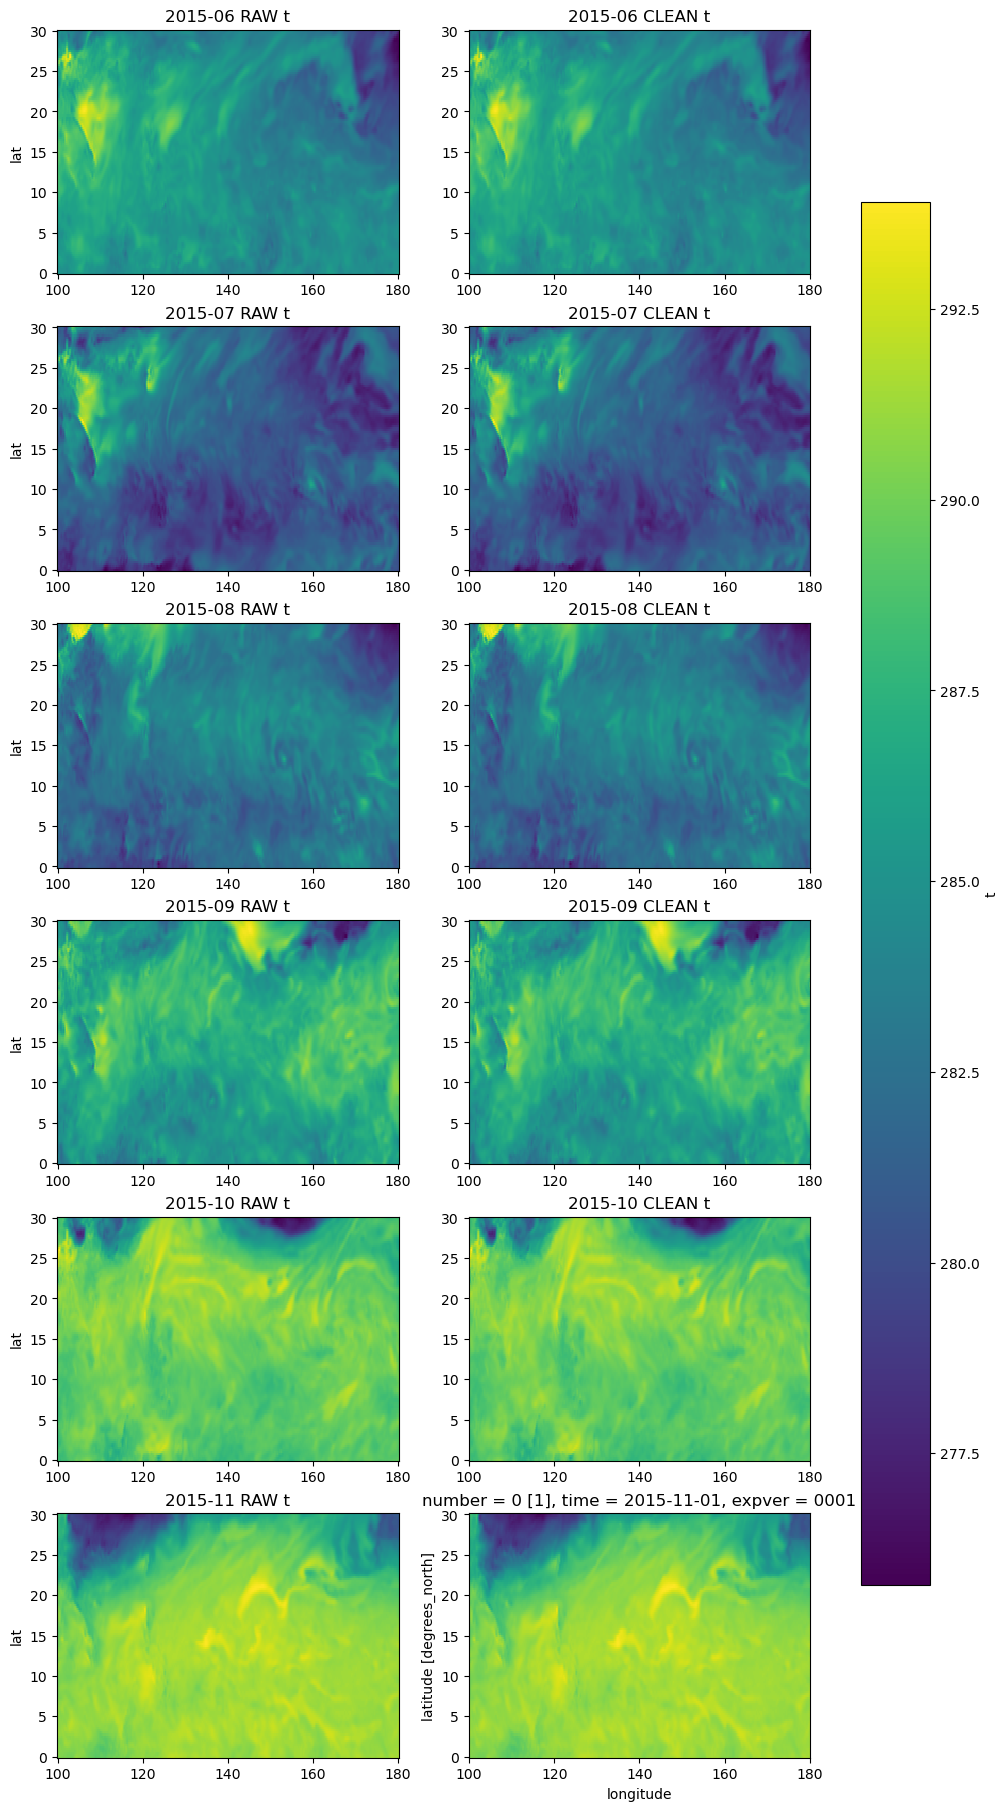

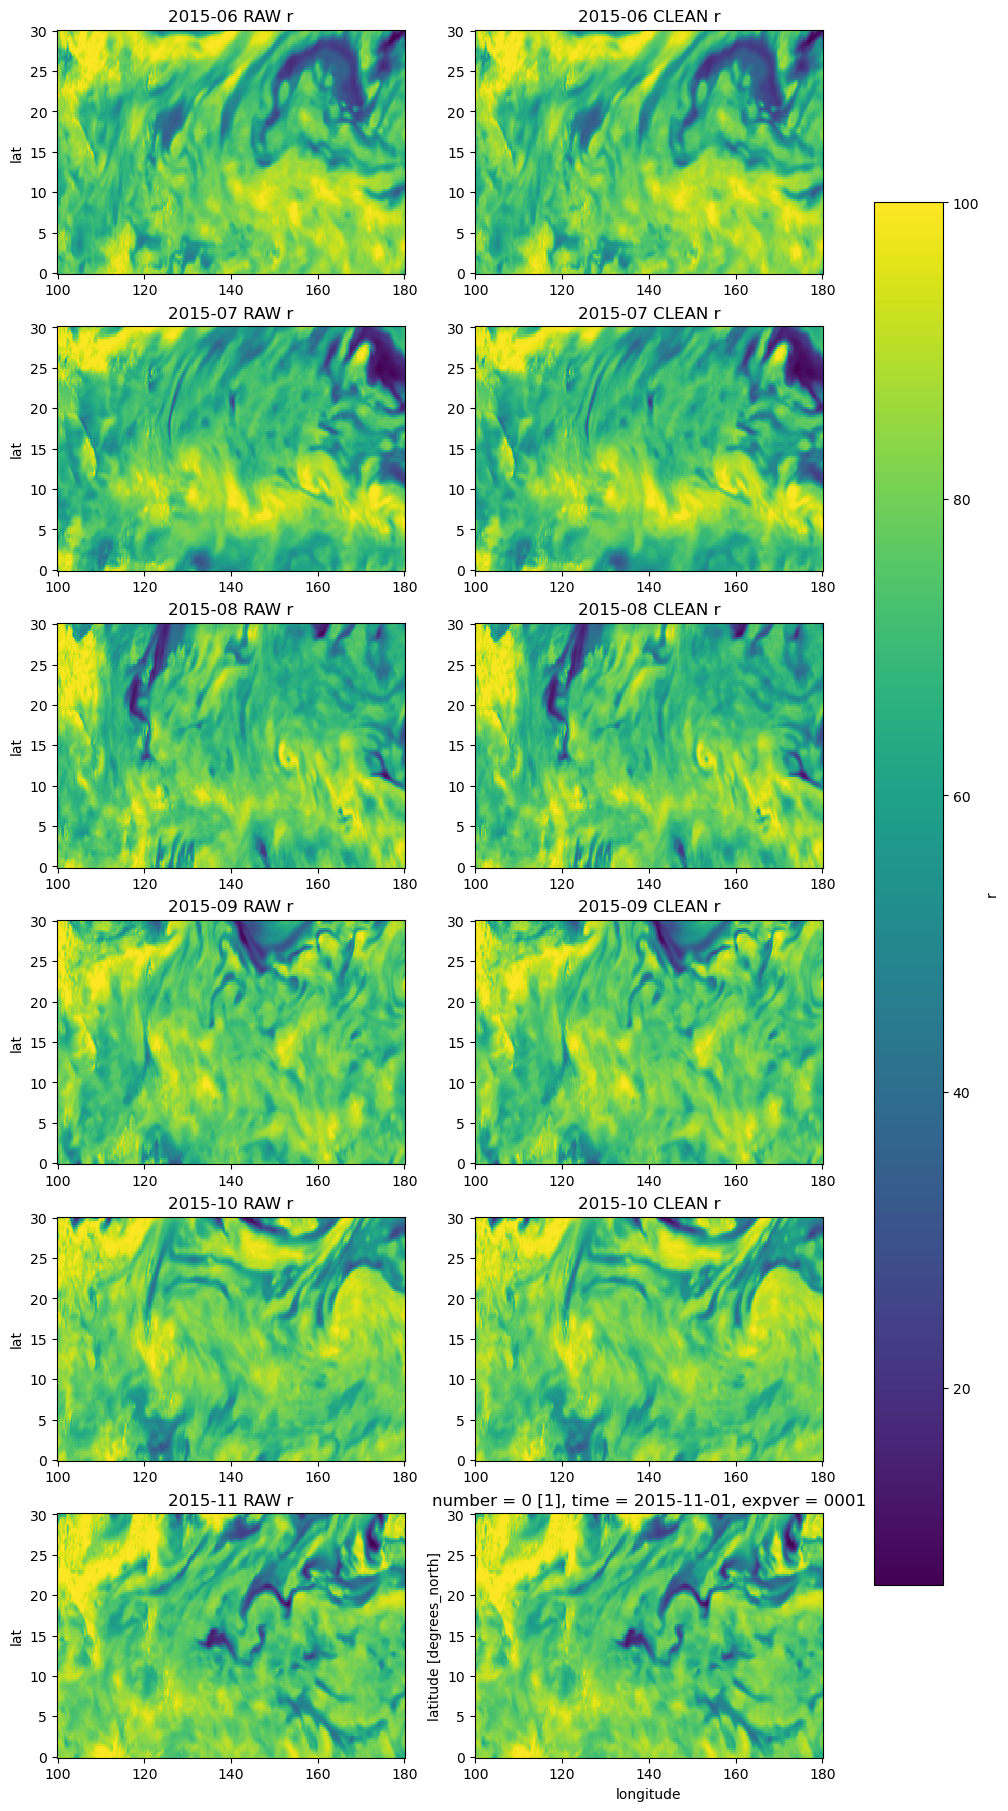

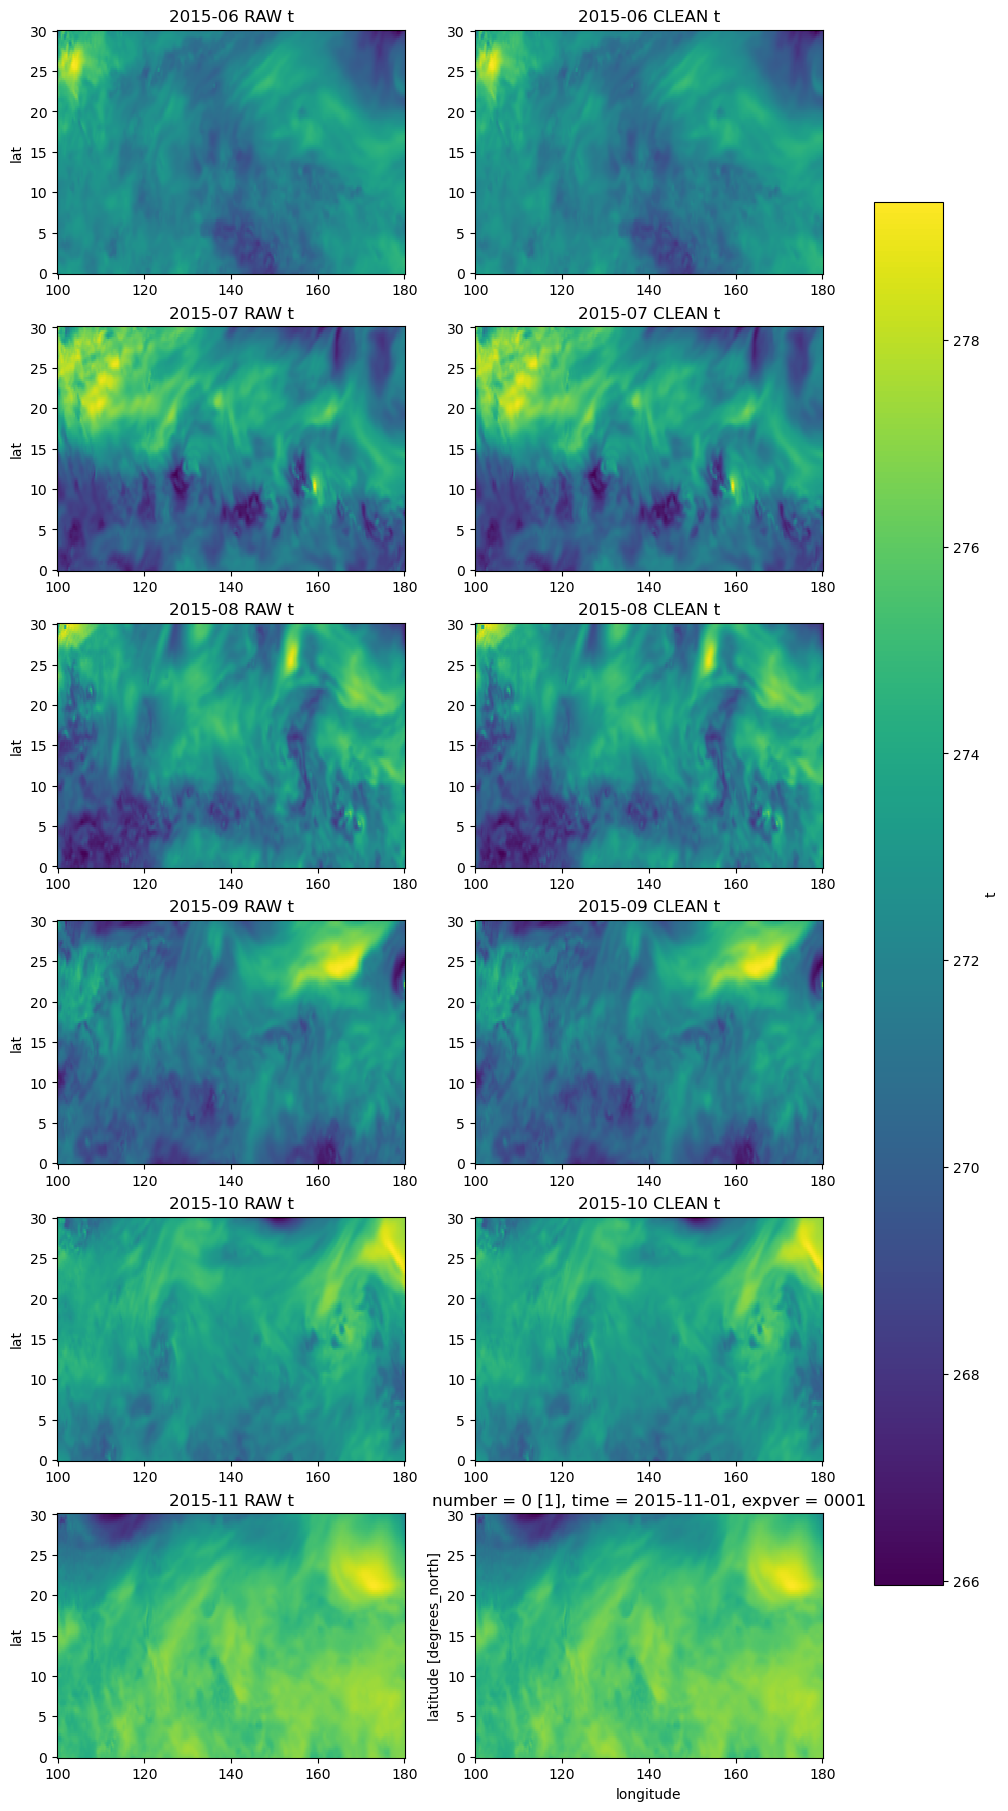

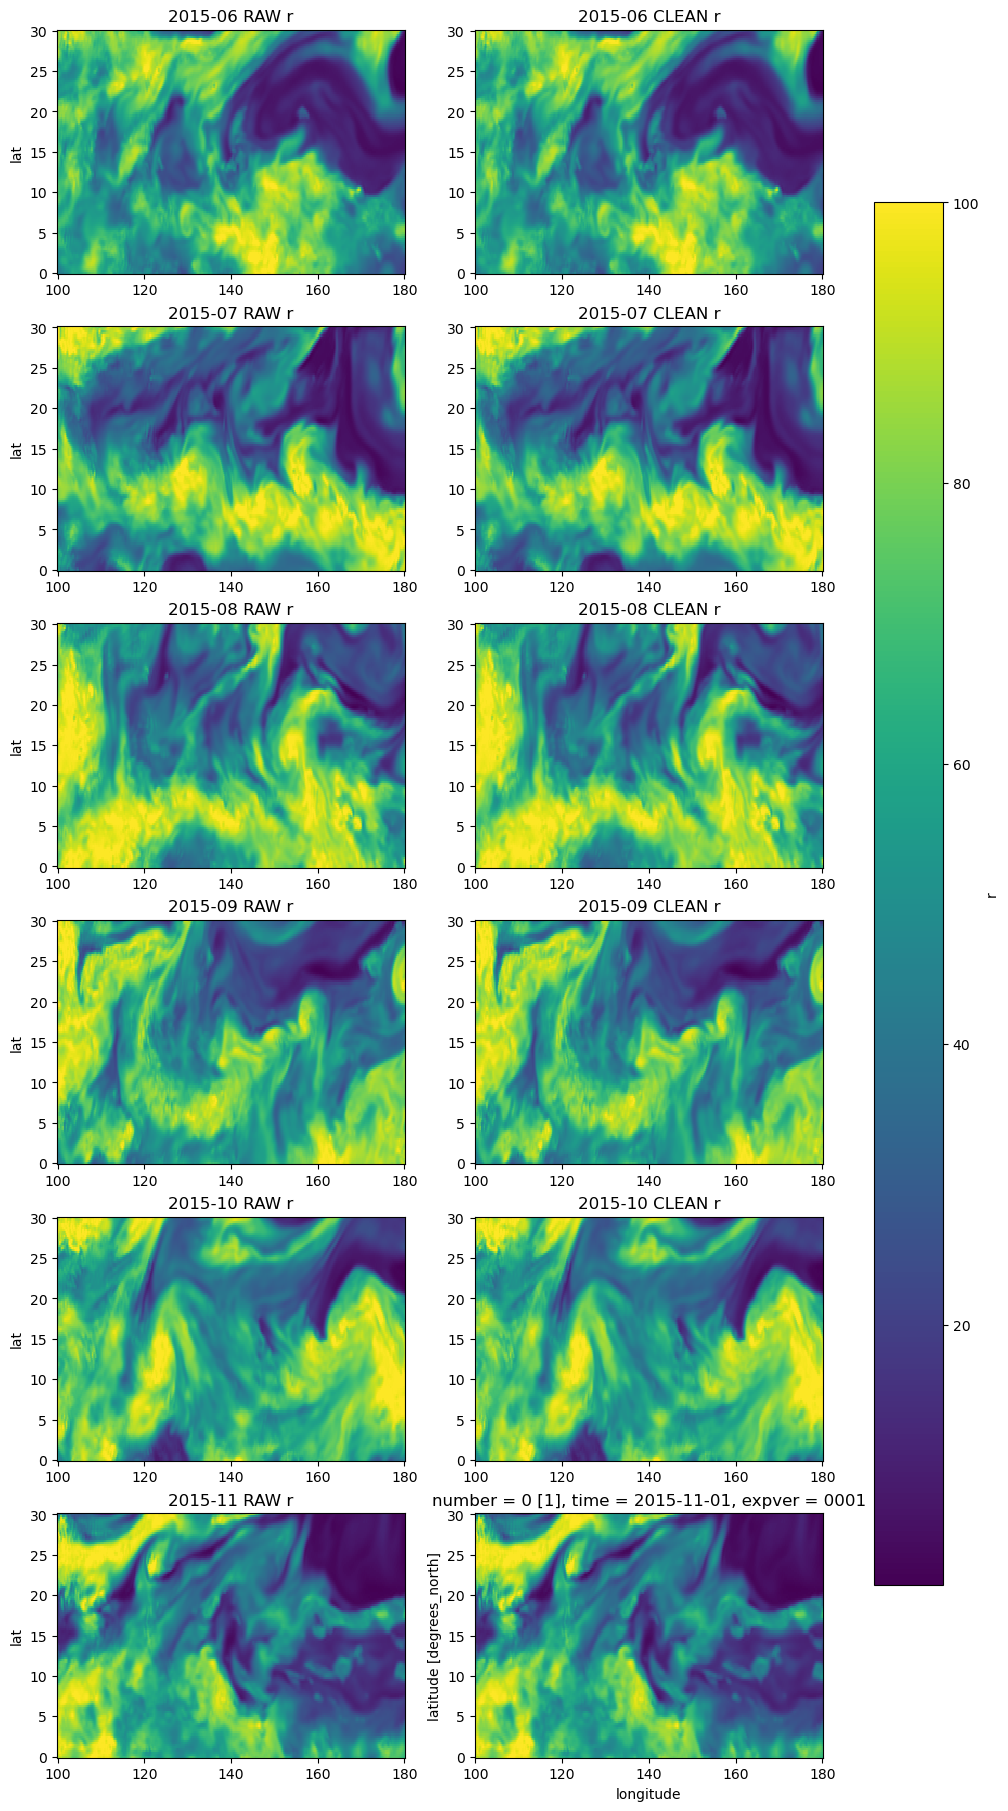

In [43]:
key_trh850 = "temperature-relative_humidity_850"
key_trh600 = "temperature-relative_humidity_600"

plot_months_compare(year, months, key=key_trh850, var="t", t_index=0)
plot_months_compare(year, months, key=key_trh850, var="r", t_index=0)

plot_months_compare(year, months, key=key_trh600, var="t", t_index=0)
plot_months_compare(year, months, key=key_trh600, var="r", t_index=0)


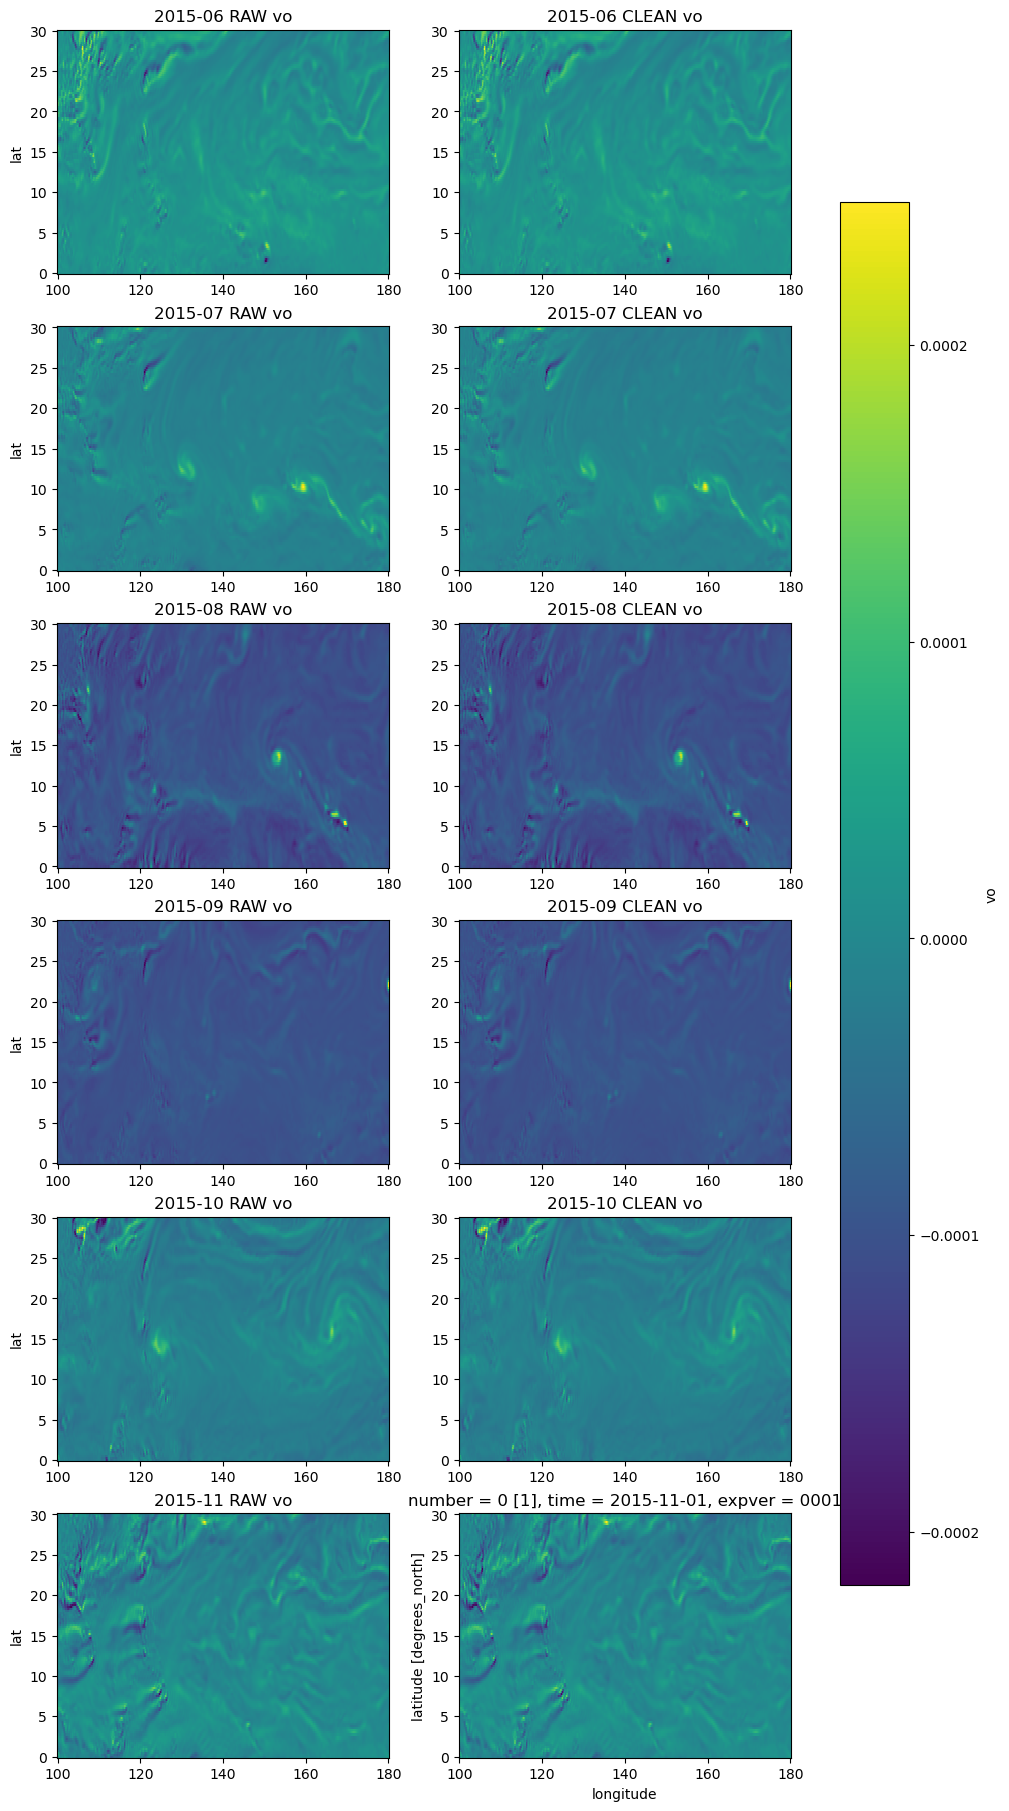

In [46]:
key_vo850 = "vorticity_850"

plot_months_compare(year, months, key=key_vo850, var="vo", t_index=0)


In [48]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

DATA_DIR   = r"C:\Users\_s2218026\Documents\lab\data"
DATA_CLEAN = r"C:\Users\_s2218026\Documents\lab\data_clean"

y, m = 2015, 6

raw_trh_path   = rf"{DATA_DIR}\era_{y}_{m:02d}_temperature-relative_humidity_850.nc"
clean_trh_path = rf"{DATA_CLEAN}\era_{y}_{m:02d}_temperature-relative_humidity_850.nc"

raw_trh   = xr.open_dataset(raw_trh_path)
clean_trh = xr.open_dataset(clean_trh_path)

print("RAW vars:", list(raw_trh.data_vars))
print("CLEAN vars:", list(clean_trh.data_vars))


RAW vars: ['t', 'r']
CLEAN vars: ['t', 'r']


In [49]:
raw_trh_std = raw_trh.rename({
    "valid_time": "time",
    "pressure_level": "level",
})


In [50]:
# Drop level dimension since it's only one level
raw_r   = raw_trh_std["r"].isel(level=0, drop=True)
clean_r = clean_trh["r"].isel(level=0, drop=True)

print("RAW RH min/max:", float(raw_r.min()), float(raw_r.max()))
print("CLEAN RH min/max:", float(clean_r.min()), float(clean_r.max()))


RAW RH min/max: 1.3732681274414062 106.79139709472656
CLEAN RH min/max: 1.3732681274414062 100.0


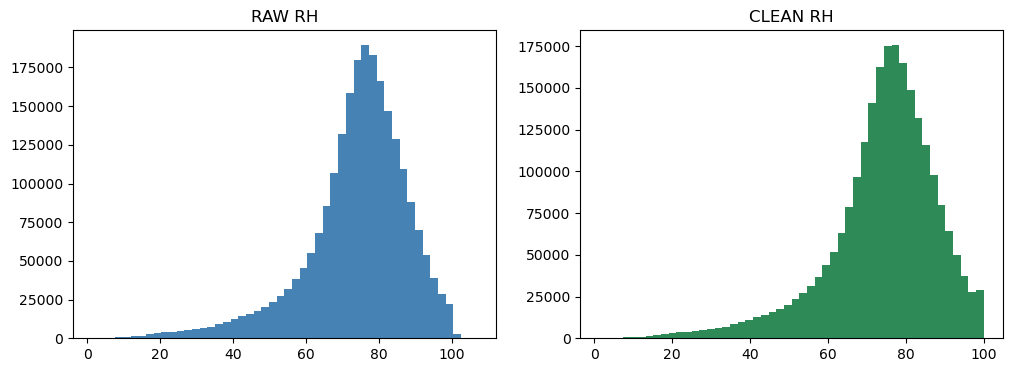

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

raw_vals = raw_r.values.flatten()
clean_vals = clean_r.values.flatten()

raw_vals = raw_vals[np.isfinite(raw_vals)]
clean_vals = clean_vals[np.isfinite(clean_vals)]

ax[0].hist(raw_vals, bins=50, color="steelblue")
ax[0].set_title("RAW RH")

ax[1].hist(clean_vals, bins=50, color="seagreen")
ax[1].set_title("CLEAN RH")

plt.show()
